In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('final_df.csv',encoding='cp949')
data.head()

,id,q1_1,q1_2,q1_3,q1_4,q1_5,q3,q4,d1,d4,...,q33,q34_1,q34_2,q34_3,q52,q53,q54,q55,d12_1,d16
0,3,8,8,9,8,8,9,9,1,1,...,3,3,3,4,3,3,8,8,0,1
1,4,8,9,7,8,7,8,6,1,1,...,3,3,3,4,2,2,3,3,0,1
2,18,8,8,7,7,7,7,6,1,1,...,3,4,4,3,2,2,6,6,300,1
3,36,8,9,8,8,7,7,8,2,1,...,3,3,3,3,3,3,7,8,0,1
4,43,7,8,8,9,8,8,9,2,1,...,3,3,3,4,3,3,7,8,0,1


In [6]:
data.columns

Index(['id', 'q1_1', 'q1_2', 'q1_3', 'q1_4', 'q1_5', 'q3', 'q4', 'd1', 'd4',
       'q5_3', 'q28_1', 'q28_2', 'q28_3', 'q28_4', 'q47_2', 'q47_3', 'q47_4',
       'q47_9', 'q47_12', 'q48_1', 'q48_2', 'q48_3', 'q48_6', 'q48_7', 'q17_1',
       'q17_2', 'q17_3', 'q17_4', 'q17_5', 'q17_6', 'q17_7', 'q17_8', 'q17_9',
       'q21_1', 'q33', 'q34_1', 'q34_2', 'q34_3', 'q52', 'q53', 'q54', 'q55',
       'd12_1', 'd16'],
      dtype='object')

In [7]:
data['d12_1'].unique()

array([  0, 300, 200, 600, 100, 400, 800, 500, 700])

In [8]:
y=pd.read_csv('social_iso.csv',encoding='cp949')

In [9]:
y.head()

,Unnamed: 0,id,social_iso
0,0,3,16
1,1,4,11
2,2,18,17
3,3,36,12
4,4,43,14


In [10]:
list(y[['id']])==list(data[['id']])

True

(array([  4.,  38.,  49., 231., 143., 432., 251.,  83.,  45.,   1.]),
 array([ 9. , 10.6, 12.2, 13.8, 15.4, 17. , 18.6, 20.2, 21.8, 23.4, 25. ]),
 <a list of 10 Patch objects>)

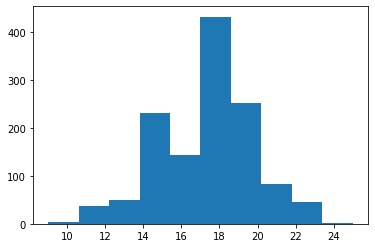

In [11]:
plt.hist(y['social_iso'])

In [12]:
mn=y['social_iso'].min()
mx=y['social_iso'].max()
data['new_y']=y['social_iso'].apply(lambda x:(x-mn)/(mx-mn))

In [13]:
data['new_y']

0       0.4375
1       0.1250
2       0.5000
3       0.1875
4       0.3125
         ...  
1272    0.4375
1273    0.6250
1274    0.5625
1275    0.5625
1276    0.5000
Name: new_y, Length: 1277, dtype: float64

(array([  4.,  38.,  49., 231., 143., 432., 251.,  83.,  45.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

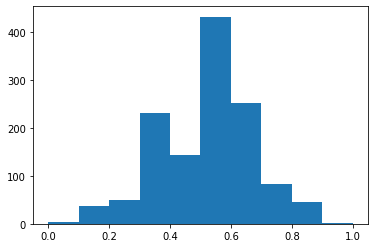

In [14]:
plt.hist(data['new_y'])

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.svm import SVR

In [30]:
df=data.copy()
X=df.drop(['id', 'new_y'],axis=1) # iso_bin
#X=df.drop(['id','social_iso'])
y=df['new_y']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
svr_rbf = SVR(kernel="rbf", C=1.0, epsilon=0.1) # kernel='rbf' : 비선형

In [33]:
svr_rbf.fit(X_train,y_train)
y_pred1=svr_rbf.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred1)
print("MSE: %.4f" % mse)
print("RMSE: %.4f" % rmse) 
print("MAE: %.4f"%mae)

MSE: 0.0209
RMSE: 0.1447
MAE: 0.1148
